In [1]:
library(magrittr)
library(ade4)
library(FactoMineR)
library(factoextra)
library(ggplot2)

Warning message:
"package 'magrittr' was built under R version 3.6.3"

ERROR: Error in library(ade4): there is no package called 'ade4'


In [2]:
## 1. Use Principle component analysis for the given data set and find the better prediction model for quantitative data.

set.seed(2)             #sets the seed for random number generation.
x <- 1:100              #creates a vector x with numbers from 1 to 100
ex <- rnorm(100, 0, 30) #100 normally distributed random numbers, mean=0, sd=30
ey <- rnorm(100, 0, 30) # 100 normally distributed random numbers, mean=0, sd=30
y <- 30 + 2 * x         #sets y to be a vector that is a linear function of x
x_obs <- x + ex         #adds "noise" to x
y_obs <- y + ey         #adds "noise" to y

     x_obs            y_obs       
 Min.   :-53.33   Min.   : 14.13  
 1st Qu.: 21.44   1st Qu.: 97.22  
 Median : 44.37   Median :134.91  
 Mean   : 49.58   Mean   :131.88  
 3rd Qu.: 77.91   3rd Qu.:174.29  
 Max.   :155.78   Max.   :252.63  

[1] 4110.45 1189.45

eigen() decomposition
$values
[1] 4110.45 1189.45

$vectors
          [,1]       [,2]
[1,] 0.4527354 -0.8916449
[2,] 0.8916449  0.4527354


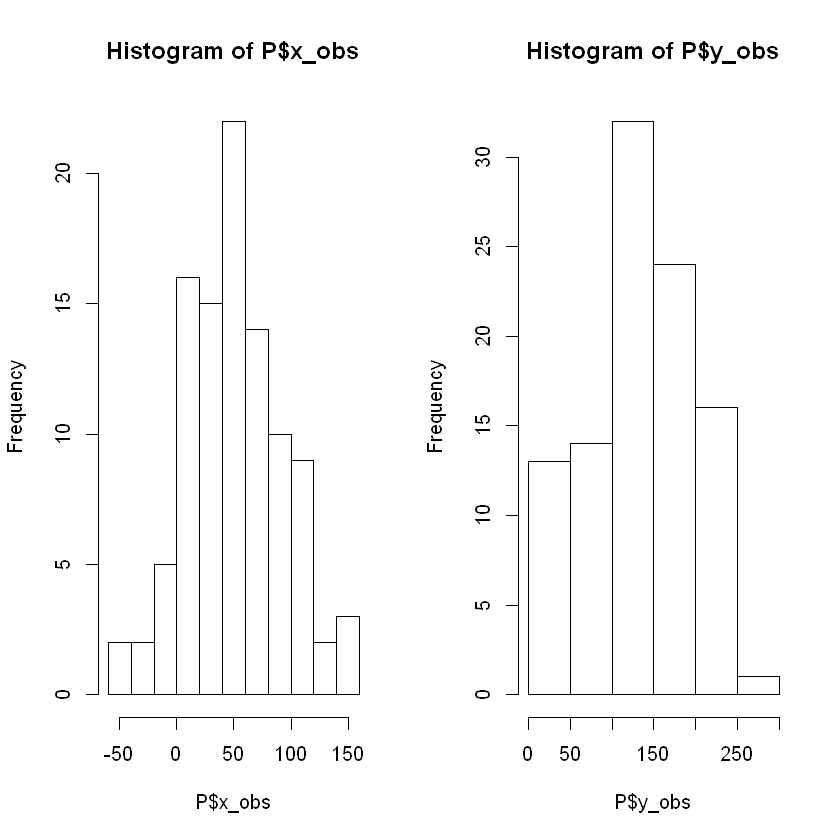

In [3]:
# Bind both vectors in a matrix of toy data called P
P <- data.frame(x_obs=x_obs,y_obs=y_obs) #places points in matrix
summary(P)

par(mfrow=c(1,2))
hist(P$x_obs)
hist(P$y_obs)

Mx<- scale(P, center=TRUE, scale=FALSE)
(svd(Mx)$d / sqrt(max(1, c(dim(Mx)- 1))))^2

MCov <- cov(Mx) 
eigen(MCov)

eigenvalues <-eigen(MCov)$values
eigenVectors<-eigen(MCov)$vectors




In [4]:
prcomp(P)

Standard deviations (1, .., p=2):
[1] 64.11279 34.48841

Rotation (n x k) = (2 x 2):
            PC1        PC2
x_obs 0.4527354 -0.8916449
y_obs 0.8916449  0.4527354

In [5]:
prcomp(P)$sdev^2

[1] 4110.45 1189.45

In [6]:
princomp(P)$sdev^2

Comp.1   Comp.2 
4069.345 1177.556

In [7]:
## 2. For the given data, based on the scree plot, find out the number of principle components and in principle component analysis.

data("USArrests")
head(USArrests, 5)
results <- prcomp(USArrests, scale = TRUE)
var_explained = results$sdev^2 / sum(results$sdev^2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6



  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



[1] 0.62006039 0.24744129 0.08914080 0.04335752


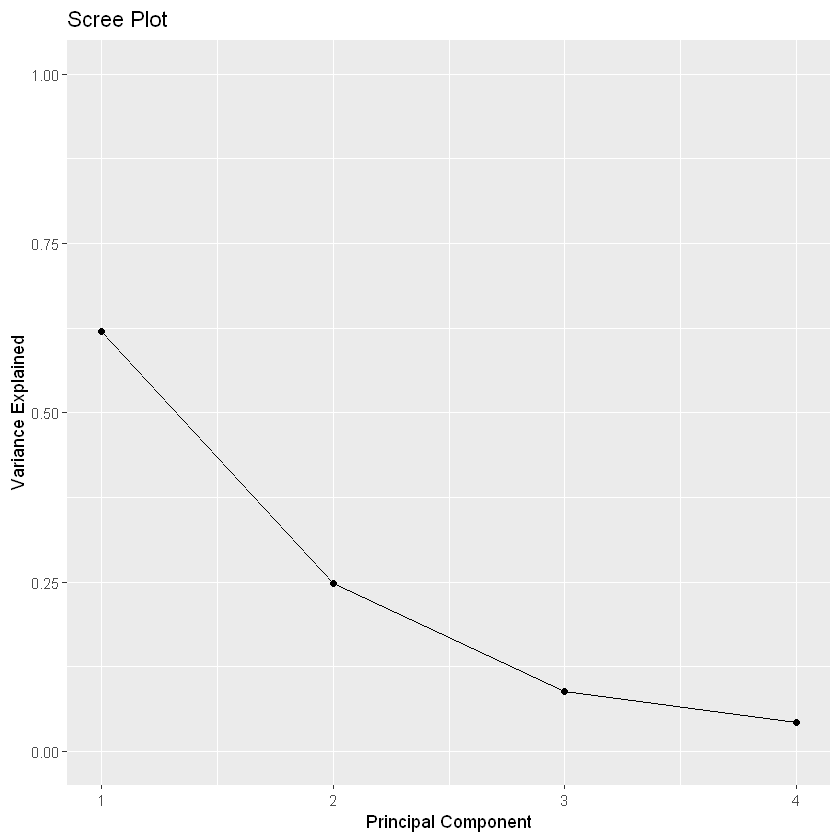

In [8]:
install.packages('ggplot2')
library(ggplot2)

qplot(c(1:4), var_explained) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

print(var_explained)

In [9]:
#The first principal component explains 62.01% of the total variation in the dataset. The second principal component explains 24.74% of the total variation in the dataset. The third principal component explains 8.91% of the total variation in the dataset. The fourth principal component explains 4.34% of the total variation in the dataset. Notice that all of the percentages sum to 100%.

data("iris")
str(iris)
summary(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [10]:
set.seed(111)
ind <- sample(2, nrow(iris),
              replace = TRUE,
              prob = c(0.8, 0.2))
training <- iris[ind==1,]
testing <- iris[ind==2,]


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



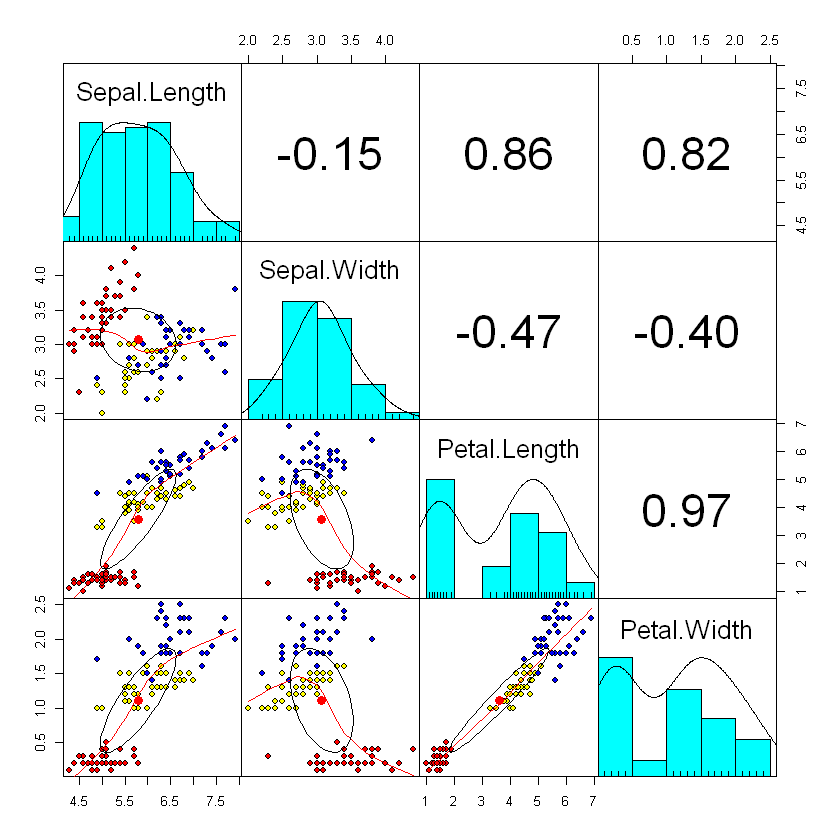

In [15]:
library(psych)
pairs.panels(training[,-5],
             gap = 0,
             bg = c("red", "yellow", "blue")[training$Species],
             pch=21)